In [52]:
import pandas as pd
from glob import glob
import json
import seaborn as sns

sns.set_theme()

In [34]:
pkl_concat = [pd.read_pickle(f) for f in glob('data/ddanzi_*.pkl')]
pkl_df = pd.concat(pkl_concat)

pkl_df['url'] = 'https://www.ddanzi.com/free/' + pkl_df.id
# pkl_df = pd.read_pickle('ddanzi_page_1_to_18000.pkl')

In [39]:
def json_read(f):
    with open(f, 'r', encoding='utf-8') as json_file:
        text = json.load(json_file)
    return text

In [40]:
json_concat = [row for f in glob('/media/bcache/jeongwoo/ddanzi/ddanzi_page_*.json') for row in json_read(f) if row is not None]
json_df = pd.DataFrame(json_concat)

In [47]:
df = pd.concat([json_df, pkl_df])

In [48]:
df.index = df.id
df.drop('id', axis=1, inplace=True)

In [49]:
df.time = pd.to_datetime(df.time)

<AxesSubplot:title={'center':'DDANZI Freeboard - # of daily posts'}>

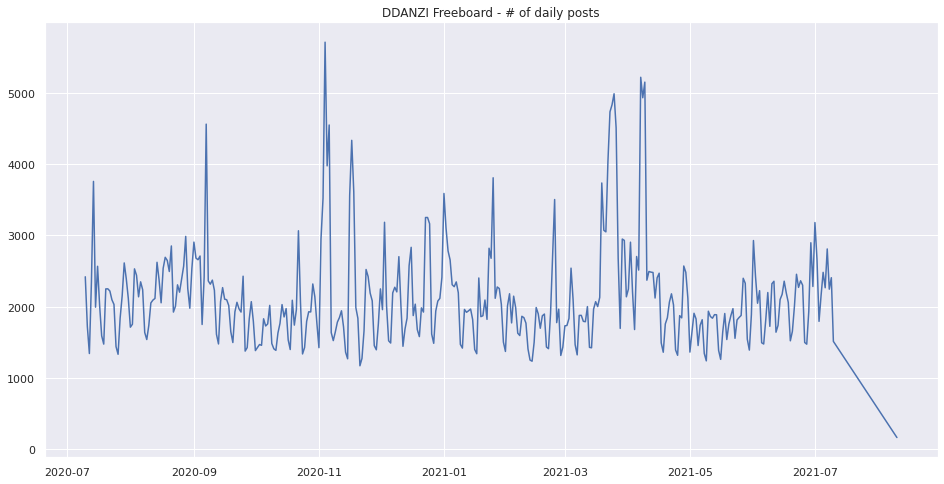

In [58]:
df.time.dt.date.value_counts().sort_index().plot(figsize=(16,8), title='DDANZI Freeboard - # of daily posts')

In [59]:
df['titletext']= df.title + '\n' + df.text

In [66]:
df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [77]:
query = "titletext.str.contains('당')"
df.query(query)

,title,text,time,url,titletext
id,,,,,
648360645,여기 정의당 관계자 분 계시면 꼭 읽어봐요,가족끼리는 정치 애기 잘 안하는데....\n \...,2020-10-18 16:24:00,https://www.ddanzi.com/free/648360645,여기 정의당 관계자 분 계시면 꼭 읽어봐요\n가족끼리는 정치 애...
633214048,흑역사로 남을 이해찬 'XX자식' 발언..내년 재보선 고민도 깊어지는 민주당,https://news.v.daum.net/v/20200718110048820\n ...,2020-07-18 11:28:00,https://www.ddanzi.com/free/633214048,흑역사로 남을 이해찬 'XX자식' 발언..내년 재보선 고민도 깊어지는 민주당\nht...
633213836,정의당 : 팝콘 각,심대표가 밀리나 했는데 그건 아닌가봅니ᄃ...,2020-07-18 11:27:00,https://www.ddanzi.com/free/633213836,정의당 : 팝콘 각\n심대표가 밀리나 했는데 그건 ᄋ...
639362633,통합당 지지율 하락 장난아니게 심각한가본데요?,이런발언하는거보면 태극기세력과의 선그...,2020-08-23 11:39:00,https://www.ddanzi.com/free/639362633,통합당 지지율 하락 장난아니게 심각한가본데요?\n이런발언하는거ᄇ...
647751984,"獨베를린 소녀상 철거 일단 보류…""당분간 그 자리에""",예상대로 보류되었네요 여론전에서 이기면 ᄃ...,2020-10-14 08:55:00,https://www.ddanzi.com/free/647751984,"獨베를린 소녀상 철거 일단 보류…""당분간 그 자리에""\n예상대로 보류ᄃ..."
...,...,...,...,...,...
685673725,민주당이 한가하게 노는지 궁금하신 분들은... 각종 진보 스피커들 방송이라도 봐주시...,거기 수많은 민주당 인사나 의원들이 아치...,2021-06-13 17:38:00,https://www.ddanzi.com/free/685673725,민주당이 한가하게 노는지 궁금하신 분들은... 각종 진보 스피커들 방송이라도 봐주시...
685673477,민주당은 최우선 과제로 언론 개혁 실행하라,페미손절 같은 저쪽의 갈라치기 프레임에 ...,2021-06-13 17:36:00,https://www.ddanzi.com/free/685673477,민주당은 최우선 과제로 언론 개혁 실행하라\n페미손절 같은 저ᄍ...
685670115,현직 문학야구장임당,난 씈팬 인데 앞에 이정후 있어서 찍어보...,2021-06-13 17:10:00,https://www.ddanzi.com/free/685670115,현직 문학야구장임당\n난 씈팬 인데 앞에 이정후 있...


https://keep-steady.tistory.com/37

Tokenize 참고!